# Word Embedding in Natural Language Processing

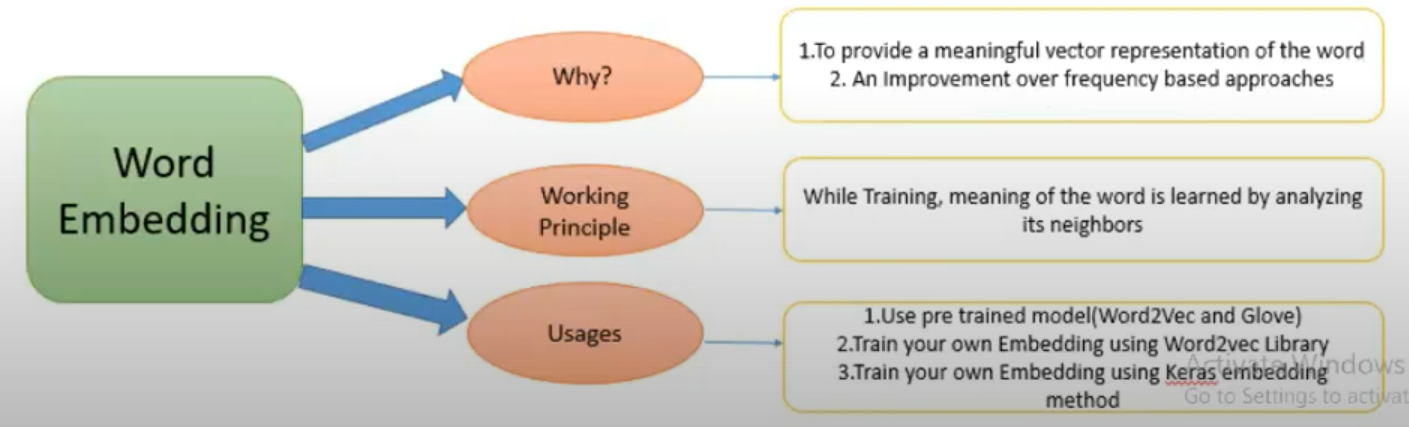

In [1]:
from IPython.display import Image
Image("/Users/jamesmin/Desktop/LMU/Algorithmische und formale Aspekte/exercises/word_embedding/why.png")

# Here I will show ow to use all three options in Python

## Option 2 - Training won Word2vec model

In [6]:
# define tokenized sentences as training data

tokenized_senteces = [['Hello', 'this', 'is', 'python', 'training', 'by', 'James'], ['Hello', 'this', 'is', 'C++', 'training', 'by', 'James'], ['Hello', 'this', 'is', 'Data Science', 'training', 'by', 'Unfold', 'Data', ' Science'], ['Hello', 'this', 'is', 'programming', 'training']]

In [7]:
# training word2vec model
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", message="numpy.ndarray size changed")
mymodel = Word2Vec(tokenized_senteces, min_count =1)


In [8]:
# summarizing the landed model
print(mymodel)

Word2Vec(vocab=13, vector_size=100, alpha=0.025)


In [9]:
# summarize vocabulary
words = list(mymodel.wv.key_to_index)

In [10]:
# summarize vocabulary
print(words)

['training', 'is', 'this', 'Hello', 'by', 'James', 'programming', ' Science', 'Data', 'Unfold', 'Data Science', 'C++', 'python']


In [11]:
# access word vector for one word "training"
print(mymodel.wv.get_vector("training"))

[-5.3764408e-04  2.3774657e-04  5.1040845e-03  9.0108458e-03
 -9.3022026e-03 -7.1165538e-03  6.4604660e-03  8.9725591e-03
 -5.0165476e-03 -3.7628452e-03  7.3812311e-03 -1.5343401e-03
 -4.5353025e-03  6.5536890e-03 -4.8588794e-03 -1.8159397e-03
  2.8757211e-03  9.9160825e-04 -8.2864985e-03 -9.4494857e-03
  7.3120971e-03  5.0717755e-03  6.7592296e-03  7.6191750e-04
  6.3515534e-03 -3.4051156e-03 -9.4679045e-04  5.7673617e-03
 -7.5216717e-03 -3.9373976e-03 -7.5108390e-03 -9.3091495e-04
  9.5391627e-03 -7.3179044e-03 -2.3338501e-03 -1.9371258e-03
  8.0773672e-03 -5.9299618e-03  4.5739780e-05 -4.7551715e-03
 -9.6041365e-03  5.0079469e-03 -8.7598152e-03 -4.3921084e-03
 -3.5255518e-05 -2.9643485e-04 -7.6613384e-03  9.6155861e-03
  4.9815550e-03  9.2328070e-03 -8.1581250e-03  4.4959462e-03
 -4.1372031e-03  8.2385371e-04  8.4994575e-03 -4.4626049e-03
  4.5179189e-03 -6.7870296e-03 -3.5477004e-03  9.3977349e-03
 -1.5786913e-03  3.2072340e-04 -4.1393479e-03 -7.6831090e-03
 -1.5094280e-03  2.46977

In [12]:
#try to find the most similar words for word "Data Science"

mymodel.wv.most_similar("Data Science")

[('python', 0.12814189493656158),
 ('C++', 0.10950659960508347),
 (' Science', 0.10892312973737717),
 ('training', 0.06289000809192657),
 ('programming', 0.05048123374581337),
 ('Data', 0.027089400216937065),
 ('James', 0.02000546082854271),
 ('Unfold', 0.01542707160115242),
 ('Hello', 0.012968349270522594),
 ('this', -0.10197696089744568)]

## How can one solve a document classification problem using above concept?

### Answer:  after applying word2vec model we can do multiclass classification using any classification algorithm like Xgboost  in that using  objective='multi:softprob'

## Option 3 - Create Embedding model using Keras Embedding

In [13]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# define documents
Sent = ['Hello, how are you', 'how are you', 'how are you doing', 'I am doing great', 'I am doing good', 'I am good']


In [14]:
# defining class labels
sent_labels = array([1,1,1,0,0,0])

In [15]:
# integer encoding of the documents

my_vocab_size = 30
encoded_sent = [one_hot(i, my_vocab_size) for i in Sent]
print(encoded_sent)

[[16, 19, 28, 8], [19, 28, 8], [19, 28, 8, 9], [28, 6, 9, 1], [28, 6, 9, 15], [28, 6, 15]]


In [16]:
# let's train a deep learning model, a neural network here. So the size of all the vectors should be the same. let's set all vector size to 5. # pre means to add a zero to the front of the vector to make it the length of 5.
# padding documents to a max length = 5
length = 5
padded_sent = pad_sequences(encoded_sent, maxlen=length, padding='pre')

print(padded_sent)

[[ 0 16 19 28  8]
 [ 0  0 19 28  8]
 [ 0 19 28  8  9]
 [ 0 28  6  9  1]
 [ 0 28  6  9 15]
 [ 0  0 28  6 15]]


In [23]:
# train NN using this matrix
# defining the model
mymodel = Sequential()
mymodel.add(Embedding(my_vocab_size, 8, input_length=length))
mymodel.add(Flatten())
mymodel.add(Dense(1, activation='sigmoid'))

In [32]:
# compiling the model
mymodel.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])


In [33]:
# fitting the model
mymodel.fit(padded_sent, sent_labels, epochs=30)

# evaluate the model
modelloss, modelaccuracy = mymodel.evaluate(padded_sent, sent_labels, verbose=0)
print('Accuracy: %f' % (modelaccuracy*100))



Epoch 1/30
1/1 [==============================] - 1s 571ms/step - loss: 0.4466 - accuracy: 1.0000
Epoch 2/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 1.0000
Epoch 3/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 1.0000
Epoch 4/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 1.0000
Epoch 5/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 1.0000
Epoch 6/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 1.0000
Epoch 9/30
1/1 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 1.0000
Epoch 11/30
1/1 [====================

# The Prediction part

In [34]:
mysent_to_predict = ['how are you James', 'I am good']

In [36]:
# integer encode the documents
vocab_size = 30
encoded = [one_hot(i, vocab_size) for i in mysent_to_predict]
print(encoded)

[[19, 28, 8, 20], [28, 6, 15]]


In [38]:
# padding documents to a max length = 5
length = 5
mypadded = pad_sequences(encoded, maxlen=length, padding='pre')
print(mypadded)

[[ 0 19 28  8 20]
 [ 0  0 28  6 15]]


In [39]:
mymodel.predict_classes(mypadded)
#the answer is 1 and 0 because all the questions sentences are classified as one and all the answer sentences are classified as 0. Also even though the word "James" was a new word, keras was able to predict and classify. Which gives an advantage from the Word2Vec model from GenSim

array([[1],
       [0]], dtype=int32)

# Option 1 - Using Pre Trained Word2Vec Model

In [42]:
from gensim.models import KeyedVectors
import os
#os.chdir("F: \\")

In [ ]:
#Download GoogleNews-vectors-negative300.bin from 
#https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz


In [ ]:
PreTrainedModel = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)


In [ ]:
# calculate:(king - man) + woman = ?
result = PreTrainedModel.most_similar("Data")
print(result)